In [3]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

np.random.seed(42)

In [4]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 35

In [5]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

In [1]:
EPOCHS = 35
class_names = ['marka']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [7]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [8]:
def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin

        class_name = class_names[int(labels[box_num])]

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        )

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))

        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        tw, th = cv2.getTextSize(
            class_name,
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image,
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image,
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [9]:
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()

    num_images = len(all_training_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

In [10]:
PATH_DATA = "C:\\D\\SKRIPSI\\dataset-v2"

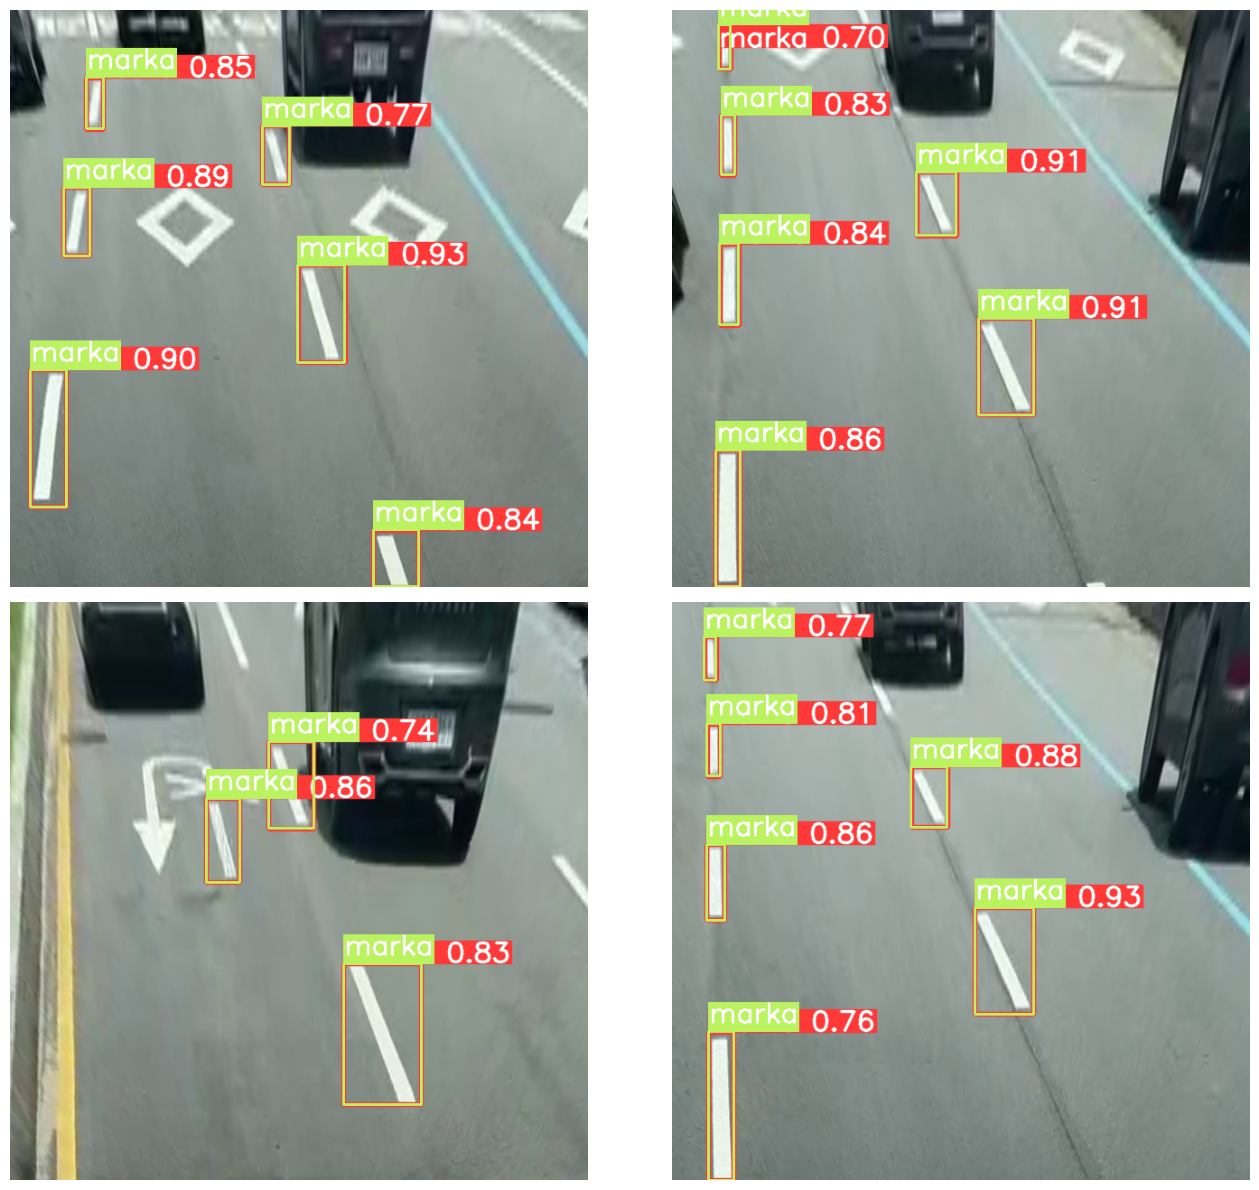

In [11]:
plot(
    image_paths=os.path.join('C:\D\SKRIPSI\yolov5\\runs\detect\inference_10','images','*'),
    label_paths=os.path.join('C:\D\SKRIPSI\yolov5\\runs\detect\inference_10','labels','*'),
    num_samples=4,
)

In [12]:
def set_res_dir():
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

In [16]:
es_dir_count = len(glob.glob('runs/train/*'))

In [17]:
es_dir_count

12

In [14]:
def monitor_tensorboard():
    %load_ext tensorboard
    %tensorboard --logdir ../yolov5/runs/train

In [13]:
%cd yolov5/

c:\D\SKRIPSI\yolov5


c:\D\SKRIPSI\env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [15]:
RES_DIR = set_res_dir()

Current number of result directories: 12
results_13


In [ ]:
def pre_train(EPOCHS,img, batch-size):
    RES_DIR = set_res_dir()
    if TRAIN:
        !python train.py --data C:/D/SKRIPSI/dataset-v2/data.yaml --weights yolov5s.pt\
        --img {img} --epochs {EPOCHS} --batch-size {batch-size} --name {RES_DIR}

Current number of result directories: 11
results_12
^C


# Hyperparameter Tunning

In [28]:
RES_DIR = set_res_dir()
if TRAIN:
    !python train.py --epochs 25  --data C:/D/SKRIPSI/dataset/data.yaml --weights yolov5s.pt --cache --evolve 100 \
--img 640 --batch-size 16 --name {RES_DIR}

Current number of result directories: 5
results_6


# Tensorboard

In [ ]:
monitor_tensorboard()

Launching TensorBoard...

In [30]:
def inference(RES_DIR, data_path):
    # Direktori untuk menyimpan inference
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference pada gambar
    !python detect.py --weights runs/train/{RES_DIR}/weights/best.pt \
    --source {data_path} --name {INFER_DIR} --save-txt --save-csv --conf-thres 0.5
    return INFER_DIR

In [31]:
inference(RES_DIR, 'C:/D/SKRIPSI/dataset-v2/test/images/')

Current number of inference detection directories: 12
inference_13


detect: weights=['runs/train/results_9/weights/best.pt'], source=C:/D/SKRIPSI/dataset-v2/test/images/, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=inference_13, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-294-gdb125a20 Python-3.10.11 torch-2.2.1+cpu CPU

Traceback (most recent call last):
  File "c:\D\SKRIPSI\yolov5\detect.py", line 312, in <module>
    main(opt)
  File "c:\D\SKRIPSI\yolov5\detect.py", line 307, in main
    run(**vars(opt))
  File "c:\D\SKRIPSI\env\lib\site-packages\torch\utils\_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "c:\D\SKRIPSI\yolov5\detect.py", line 115, in run
    model = DetectMultiBackend(weig

'inference_13'

In [32]:
def inference_csv(RES_DIR, data_path):
    # Directory to store inference results.
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference on images.
    !python detect.py --weights runs/train/results_10/weights/best.pt \
    --source {data_path} --name {INFER_DIR} --save-txt --save-csv --conf-thres 0.5
    return INFER_DIR

In [2]:
RES_DIR = set_res_dir()

NameError: name 'set_res_dir' is not defined

In [27]:
inference_csv(RES_DIR, 'C:/D/SKRIPSI/KITTI/Transform/test')

Current number of inference detection directories: 4
inference_5


detect: weights=['runs/train/results_10/weights/best.pt'], source=C:/D/SKRIPSI/KITTI/Transform/test, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=inference_5, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-294-gdb125a20 Python-3.10.11 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/299 C:\D\SKRIPSI\KITTI\Transform\test\warpedum_000000.png: 640x640 4 markas, 105.7ms
image 2/299 C:\D\SKRIPSI\KITTI\Transform\test\warpedum_000001.png: 640x640 4 markas, 88.9ms
image 3/299 C:\D\SKRIPSI\KITTI\Transform\test\warpedum_000002.png: 640x640 4 markas, 82.7ms
image 4/299 C:\D\SKRIPSI\KITTI\Transform\test\warpedu

'inference_5'

# Inference Videos

In [ ]:
def inference(RES_DIR, data_path):
    # Direktori untuk menyimpan inference
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference pada gambar
    !python detect.py --weights runs/train/{RES_DIR}/weights/model.pt \
    --source {data_path} --name {INFER_DIR} --save-txt --save-csv --conf-thres 0.5
    return INFER_DIR


In [34]:
inference('results_10', 'C:\D\SKRIPSI\data_lstm\warped')

Current number of inference detection directories: 13
inference_14


Traceback (most recent call last):
  File "c:\D\SKRIPSI\yolov5\detect.py", line 46, in <module>
    from ultralytics.utils.plotting import Annotator, colors, save_one_box
  File "c:\D\SKRIPSI\env\lib\site-packages\ultralytics\__init__.py", line 5, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "c:\D\SKRIPSI\env\lib\site-packages\ultralytics\data\explorer\__init__.py", line 3, in <module>
    from .utils import plot_query_result
  File "c:\D\SKRIPSI\env\lib\site-packages\ultralytics\data\explorer\utils.py", line 8, in <module>
    import pandas as pd
  File "c:\D\SKRIPSI\env\lib\site-packages\pandas\__init__.py", line 62, in <module>
    from pandas.core.api import (
  File "c:\D\SKRIPSI\env\lib\site-packages\pandas\core\api.py", line 28, in <module>
    from pandas.core.arrays import Categorical
  File "c:\D\SKRIPSI\env\lib\site-packages\pandas\core\arrays\__init__.py", line 19, in <module>
    from pandas.core.arrays.sparse import SparseArray
  File "c:

'inference_14'

In [35]:
from warpPerspective import warp_perspective, warped, unwarped

ModuleNotFoundError: No module named 'warpPerspective'

# Load Model

In [36]:
import torch

In [38]:
model = torch.load('C:\\D\\SKRIPSI\\yolov5\\runs\\train\\results_10\\weights\\best.pt')

In [39]:
model

{'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
       (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C3(
       (cv1): Conv(
         (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): Conv(
         (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_

## DeepSORT-Tracking

In [8]:
def get_video_info(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file is opened successfully
    if not cap.isOpened():
        raise ValueError("Error: Could not open the video file.")

    # Get the frame width and frame height
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    return cap, frame_width, frame_height

In [9]:
video_path = 'C:\D\SKRIPSI\\test.mp4'
cap, frame_width, frame_height = get_video_info(video_path)

In [10]:
def load_model(model_name):
    # Check if CUDA (GPU) is available and set the device accordingly
    device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

    # Load the specified model
    model = models.get(model_name, pretrained_weights="coco").to(device)
    return model